In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, log_loss
)

from sklearn import metrics

In [4]:
df = pd.read_csv('heart.csv') # Heart Disease Classification
df.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


In [5]:
X = df.iloc[:, 0:13].values # Features
Y = df.iloc[:, 13].values # Labels

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.20, random_state=0
)
# 80/20 split

In [7]:
print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Training samples: 820
Test samples: 205


In [8]:
sc_X = StandardScaler() # Create scaler object
X_train = sc_X.fit_transform(X_train) # Fit to training data and transform
X_test  = sc_X.transform(X_test) # Transform test data using same scaler
print("Train mean (first 5):", X_train.mean(axis=0)[:5])
print("Train std  (first 5):", X_train.std(axis=0, ddof=0)[:5])

Train mean (first 5): [-5.42926138e-17 -2.22044605e-16  4.60336376e-18  5.40015187e-16
 -2.75660253e-16]
Train std  (first 5): [1. 1. 1. 1. 1.]


In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,        # Number of trees
    max_depth=None,          # Let trees grow fully
    class_weight='balanced', # Handle class imbalance
    random_state=0
)
rf.fit(X_train, Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [39]:
Y_pred = rf.predict(X_test)

In [40]:
Y_pred[0:100]

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1])

In [41]:
print("Predictions (first 10):", Y_pred[:20])
print("Actual (first 10):     ", Y_test[:20])

Predictions (first 10): [1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0]
Actual (first 10):      [1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0]


In [42]:
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[ 98,   0],
       [  0, 107]])

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Accuracy: overall correct predictions
print("Accuracy:", accuracy_score(Y_test, Y_pred))

# Precision, Recall, F1 for each class (macro = unweighted average)
print("Precision (macro):", precision_score(Y_test, Y_pred, average='macro'))
print("Recall (macro):", recall_score(Y_test, Y_pred, average='macro'))
print("F1 Score (macro):", f1_score(Y_test, Y_pred, average='macro'))

# Detailed report per class
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



Text(0.5, 427.9555555555555, 'Predicted Label')

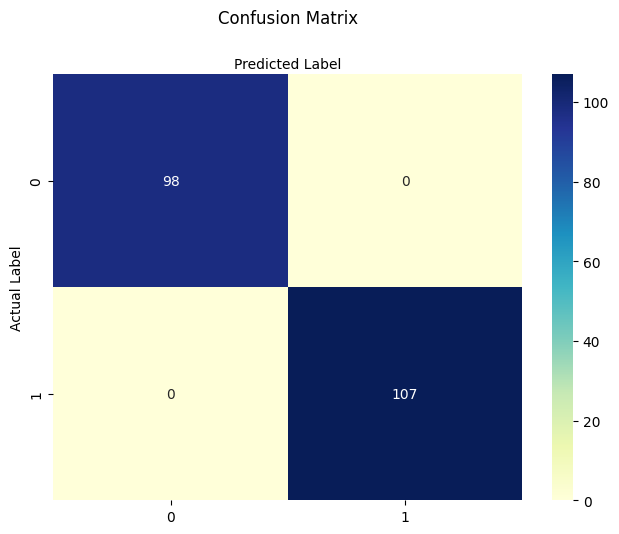

In [44]:
# Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.
# Here, you will visualize the confusion matrix using Heatmap.
class_names=[1, 2, 3] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')